# Python imports

In [19]:
import matplotlib.pyplot as plt
# Seaborn is my preferred Matplotlib extension
import seaborn as sns
import numpy as np
import sys
import os

# Set some basic seaborn parameters
sns.set(style='whitegrid', font='serif', font_scale=2.5)
figsize = (12, 12)

# Introduction

This notebook uses a 1,000-realization simulation (10 experiment realizations, 10 observations per experiment realization, 10 detector realizations per observation) of the example experiment to show how you might go about unpacking and inspecting BoloCalc outputs. Hopefully these examples and descriptions can act as a guide for more general use. Please copy and paste code from this notebook into your own! For more inforation about how to use BoloCalc, please see the user manual.

# The Unpack class

Data can be accessed using the Unpack class, which is located in the BoloCalc/src/ directory. Its constructor doesn't take any arguments. An example object instantiation is shown below.

In [20]:
# Import unpack.py from the BoloCalc/src/ directory
src_path = os.path.join("..", "src")
if src_path not in sys.path:
    sys.path.append(src_path)
import unpack as up

# Instantiate an Unpack object
unpack = up.Unpack()

The unpack class has three methods and four dictionaries that you can use to access the data

1. Sensitivity method: `unpack.unpack_sensitivities(experiment_directory)`
2. Parameter vary method: `unpack.unpack_parameter_vary(experiment_directory, parameter_vary_name)`
3. Optical power method: `unpack.unpack_optical_powers(experiment_directory)`
4. Sensitivity output dictionary: `unpack.sens_outputs`
5. Parameter vary input dictionary: `unpack.vary_inputs`
6. Parameter vary output dictionary: `unpack.vary_outputs`
7. Optical powers dictionary: `unpack.pwr_outputs`

In the following two sections, we'll look at how you might go about using these methods and dictionaries to inspect the outputs of your BoloCalc simulation

# Analyzing sensitivity outputs

In this section, we look at examples of how to unpack and analyze BoloCalc outputs.

## Unpacking outputs

To unpack sensitivity data from a simulated experiment, use the `unpack.unpack_sensitivities()` function, and pass it as an argument the **aboslute** path of the experiment directory. This should be the absolute path of the same directory you passed to `calcBolos.py`. For this example, we ran the `BoloCalc $ python calcBolos.py Experiments/ExampleExperiment/V0`, so we pass the abslute path for that same input directory to `unpack.unpack_sensitivities()`

In [21]:
exp_dir = os.path.abspath(os.path.join(
    '..', 'Experiments', 'ExampleExperiment', 'V0'))
unpack.unpack_sensitivities(exp_dir)

## Sensitivity dictionary structure

**There are two types of sensitivity outputs**:
1. Sensitivity summary data, which is a three-element array of `[median, high spread, low spread]`, where the percentiles defined in `BoloCalc/config/simulationInputs.txt` = `[low CL, high CL]` are defined by `[median - low spread, median + high spread]`
2. All MC data, which is an array of calculated outputs for every MC realization

**The sensitivity data is embedded in the layered dictionary** `unpack.sens_outputs`, which has four levels:

1. First-layer key = experiment (e.g. `"V0"`)
2. Second-layer keys = telescopes (e.g. `"Tel"`) or experiment sensitivity summary `"Summary"`
3. Third-layer keys = cameras (e.g. `"Cam"`) or telescope sensitivity summary `"Summary"`
4. Fourth-layer key = camera sensitivity summary `"Summary"` or all MC outputs `"All"`

BoloCalc generates a `"Summary"` key at levels (2, 3, 4):

2. The experiment `"Summary"` dictionary holds the band-combined sensitivitie summaries for that experiment's telescopes 
3. The telescope `"Summary"` dictionary holds the band-combined sensitivitie summaries for that telescope's cameras
4. The camera `"Summary"` dictionary sensitivite summaries for each channel in that camera

In contrast, BoloCalc only generates an `"All"` key at the camera level (4).

Below is a printout of the keys for the `unpack.sens_outputs` dict

In [22]:
print("First-layer key = experiment")
print(list(unpack.sens_outputs.keys()))

print("\nSecond-layer keys = telescopes + experiment sensitivity")
print(list(unpack.sens_outputs['V0'].keys()))

print("\nThird-layer keys = cameras + telescope sensitivity")
print(list(unpack.sens_outputs['V0']['Tel']))

print("\nFourth-layer keys = camera sensitivity + MC outputs")
print(list(unpack.sens_outputs['V0']['Tel']['Cam'].keys()))

First-layer key = experiment
['V0']

Second-layer keys = telescopes + experiment sensitivity
['Tel', 'Summary']

Third-layer keys = cameras + telescope sensitivity
['Cam', 'Summary']

Fourth-layer keys = camera sensitivity + MC outputs
['Summary', 'All']


## Accessing sensitivity summary data

**Each `"Summary"` and `"All"` key points to a dictionary of the following structure**

1. First-layer key: channel name (e.g. "Cam_1") or "Total" for all channels
2. Second-layer key: sensitivity parameter name (e.g. "Array NET_CMB")

For the `"Summary"` key, the second-layer value is an array of three values: `[median, high spread, low spread]`. If the low and high spreads are zero, then this output parameter remained unchanged throughout the MC simulation. For the `"All"` key, the second-layer value is an array of all MC-generated outputs.

**`"Summary"` and `"All"` keys for the experiment and telescope sensitivity sub-dictionaries**
1. `Num Det` = number of detectors
2. `Array NET_CMB` = array noise-equivalent CMB temperature in `[uK_CMB-rts]`
3. `Array NET_RJ` = array noise-equivalent RJ temperature in `[uK_RJ-rts]`
4. `CMB Map Depth` = map depth in `[uK_CMB-amin]`
5. `RJ Map Depth` = map depth in `[uK_RJ-amin]`

**`"Summary"` and `"All"` keys for the camera sensitivity sub-dictionaries**
1. `Num Det` = number of detectors
2. `Optical Throughput` = optical throughput, withOUT the aperture stop efficiency divided out
3. `Optical Power` = optical power in `[pW]`
4. `Telescope Temp` = telescope temperature, referenced to the instrument's first optic, in `[K_RJ]`
5. `Sky Temp` = sky temperature in `[K_RJ]`
6. `Photon NEP` = photon noise-equivalent power in `[aW/rtHz]`
7. `Bolometer NEP` = bolometer thermal carrier noise-equivalent power in `[aW/rtHz]`
8. `Readout NEP` = readout noise-equivalent power in `[aW/rtHz]`
9. `Detector NEP` = total detector noise-equivalent power in `[aW/rtHz]`
10. `Detector NET_CMB` = per-detector noise-equivalent CMB temperature in `[uK_CMB-rts]`
11. `Detector NET_RJ` = per-detector noise-equivalent CMB temperature in `[uK_RJ-rts]`
12. `Array NET_CMB` = array noise-equivalent CMB temperature in `[uK_CMB-rts]`
13. `Array NET_RJ` = array noise-equivalent RJ temperature in `[uK_RJ-rts]`
14. `Correlation Factor` = degree of white-noise correlation across the focal plane
15. `CMB Map Depth` = map depth in `[uK_CMB-amin]`
16. `RJ Map Depth` = map depth in `[uK_RJ-amin]`

Below is a printout of the various keys at each level. Note that for the camera sensitivity dictionary, "Total" only has a subset of the shown parameters.

In [23]:
print("Experiment sensitivity summary channel keys")
print(list(unpack.sens_outputs['V0']['Summary'].keys()))

print("Available experiment sensitivity summary lables")
print(list(unpack.sens_outputs['V0']['Tel']['Summary']['Cam_1'].keys()))

print("Example 'CMB Map Depth' sensitivity summary data")
print(list(unpack.sens_outputs['V0']['Summary']['Cam_1']['CMB Map Depth']))

print("\nTelescope sensitivity summary channel keys")
print(list(unpack.sens_outputs['V0']['Tel']['Summary'].keys()))

print("Available telescope sensitivity summary lables")
print(list(unpack.sens_outputs['V0']['Tel']['Summary']['Cam_1'].keys()))

print("Example 'Array NET_CMB' sensitivity summary data")
print(list(unpack.sens_outputs['V0']['Tel']['Summary']['Cam_1']['Array NET_CMB']))

print("\nCamera sensitivity summary channel keys")
print(list(unpack.sens_outputs['V0']['Tel']['Cam']['Summary'].keys()))

print("Available camera sensitivity summary lables")
print(list(unpack.sens_outputs['V0']['Tel']['Cam']['Summary']['Cam_1'].keys()))

print("Example 'Optical Power' sensitivity summary data")
print(list(unpack.sens_outputs['V0']['Tel']['Cam']['Summary']['Cam_1']['Optical Power']))

Experiment sensitivity summary channel keys
['Cam_1', 'Cam_2', 'Total']
Available experiment sensitivity summary lables
['Num Det', 'Array NET_CMB', 'Array NET_RJ', 'CMB Map Depth', 'RJ Map Depth']
Example 'CMB Map Depth' sensitivity summary data
[9.54, 0.0, 0.0]

Telescope sensitivity summary channel keys
['Cam_1', 'Cam_2', 'Total']
Available telescope sensitivity summary lables
['Num Det', 'Array NET_CMB', 'Array NET_RJ', 'CMB Map Depth', 'RJ Map Depth']
Example 'Array NET_CMB' sensitivity summary data
[13.9, 0.0, 0.0]

Camera sensitivity summary channel keys
['Cam_1', 'Cam_2', 'Total']
Available camera sensitivity summary lables
['Num Det', 'Optical Throughput', 'Optical Power', 'Telescope Temp', 'Sky Temp', 'Photon NEP', 'Bolometer NEP', 'Readout NEP', 'Detector NEP', 'Detector NET_CMB', 'Detector NET_RJ', 'Array NET_CMB', 'Array NET_RJ', 'Correlation Factor', 'CMB Map Depth', 'RJ Map Depth']
Example 'Optical Power' sensitivity summary data
[1.64, 0.0, 0.0]


### Output parameter labels and units

Units are not automatically imported by the Unpack class from the sensitivity files, as I usually write them using latex in my plots anyway. Additionally, the dictionary keys aren't perfect labels for plots and tables. For the user's convenience, I've included a unit dictionary and label dictionary below that can be used when generating tables and plots

In [24]:
unit_dict = {
    'Num Det': '[NA]',
    'Optical Throughput': '[NA]',
    'Optical Power': '[pW]',
    'Telescope Temp': '[$\mathrm{K_{RJ}}$]',
    'Sky Temp': '[$\mathrm{K_{RJ}}$]',
    'Photon NEP': '[$\mathrm{aW / \sqrt{Hz}}$]',
    'Bolometer NEP': '[$\mathrm{aW / \sqrt{Hz}}$]',
    'Readout NEP': '[$\mathrm{aW / \sqrt{Hz}}$]',
    'Detector NEP': '[$\mathrm{aW / \sqrt{Hz}}$]',
    'Detector NET_CMB': '[$\mathrm{\mu K_{CMB} \sqrt{s}}$]',
    'Detector NET_RJ': '[$\mathrm{\mu K_{RJ} \sqrt{s}}$]',
    'Array NET_CMB': '[$\mathrm{\mu K_{CMB} \sqrt{s}}$]',
    'Array NET_RJ': '[$\mathrm{\mu K_{RJ} \sqrt{s}}$]',
    'Correlation Factor': '[NA]',
    'CMB Map Depth': '[$\mathrm{\mu K_{CMB} \; amin}$]',
    'RJ Map Depth': '[$\mathrm{\mu K_{RJ} \; amin}$]'}

label_dict = {
    'Num Det': '$\mathrm{N_{Det}}$',
    'Optical Throughput': '$\mathrm{\eta_{opt}}$',
    'Optical Power': '$\mathrm{P_{opt}}$',
    'Telescope Temp': '$\mathrm{T_{Tel}}$',
    'Sky Temp': '$\mathrm{T_{Sky}}$',
    'Photon NEP': '$\mathrm{NEP_{ph}}$',
    'Bolometer NEP': '$\mathrm{NEP_{g}}$',
    'Readout NEP': '$\mathrm{NEP_{read}}$',
    'Detector NEP': '$\mathrm{NEP_{det}}$',
    'Detector NET_CMB': '$\mathrm{NET_{det}}$',
    'Detector NET_RJ': '$\mathrm{NET_{det}}$',
    'Array NET_CMB': '$\mathrm{NET_{arr}}$',
    'Array NET_RJ': '$\mathrm{NET_{arr}}$',
    'Correlation Factor': '$\mathrm{\Gamma_{corr}}$',
    'CMB Map Depth': '$\mathrm{\sigma_{map}}$',
    'RJ Map Depth': '$\mathrm{\sigma_{map}}$'}

## Accessing MC output data

**At each `"All"` key is a dictionary of the following structure**

1. First-layer key: channel name (e.g. "Cam_1")
2. Second-layer key: sensitivity parameter name (e.g. "Array NET_CMB")

The second-layer value is an sim-time-sorted array of MC-realized values. The length of the array will match the total number of realizations (Experiment realizations x Observations x Detector realizations) generated by the MC.

Below is a printout of the various keys at each level.

In [25]:
print("Camera output channel keys")
print(list(unpack.sens_outputs['V0']['Tel']['Cam']['All'].keys()))

print("Available camera sensitivity lables")
print(list(unpack.sens_outputs['V0']['Tel']['Cam']['All']['Cam_1'].keys()))

print("Example 'Optical Power' sensitivity data")
print(list(unpack.sens_outputs['V0']['Tel']['Cam']['All']['Cam_1']['Optical Power'][:100]))

Camera output channel keys
['Cam_1', 'Cam_2']
Available camera sensitivity lables
['Optical Throughput', 'Optical Power', 'Telescope Temp', 'Sky Temp', 'Photon NEP', 'Bolometer NEP', 'Readout NEP', 'Detector NEP', 'Detector NET_CMB', 'Detector NET_RJ', 'Array NET_CMB', 'Array NET_RJ', 'Correlation Factor', 'CMB Map Depth', 'RJ Map Depth']
Example 'Optical Power' sensitivity data
[1.6399]


## Example sensitivity tables

The most common use for BoloCalc is to generate tables of outputs. These tables are contained in ASCII format within the raw `sensitivity.txt` files, but often times it's useful to create a more presentable, tidy table. The below example code shows how one might generate iPython-friendly tables for experiment, telescope, and camera sensitivities.

In [26]:
# Define a method to convert 
# [median, hi +/- value, low +/- value]
# in a displayable string
def spread(inp_str):
    mean, lo, hi = inp_str
    if (float(lo) == 0) and (float(hi) == 0):
        output_str = "%g" % (mean)
    else:
        output_str = "%g +/- (%g, %g)" % (mean, hi, lo)
    return output_str

### Experiment sensitivity table

In [27]:
# Load the sensitivity from the experiment 
# layer of the sensitivity output dictionary
exp_dict = unpack.sens_outputs['V0']['Summary']

# Labels for the parameters 
# (e.g. "Channel," "Optical Throughout," "Readout NEP," etc.)
param_row = ['Channel'] + [label_dict[k]
                           for k in list(exp_dict[
                               list(exp_dict.keys())[0]].keys())]
unit_row = ['Units'] + [unit_dict[k]
                        for k in list(exp_dict[
                            list(exp_dict.keys())[0]].keys())]
header_sep = ['---'] * len(param_row)
# Labels for the data rows, which should be the channel names and "Total"
ch_labs = [[lab for lab in list(exp_dict.keys())]]
# Data to populate the rows
data_rows = np.concatenate([
    np.transpose(ch_labs),
    [[spread(v[k])
      for k in list(v.keys())]
      for v in list(exp_dict.values())]], axis=-1).tolist()
# Generate table string
table_rows = [param_row, header_sep, unit_row]  + data_rows
table_str = ""
for row in table_rows:
    row_str = '|'.join(row)+'\n'
    table_str += row_str
print("Copy and paste the below into a separate markdown "
      "cell to render the table\n\n")
print(table_str)

Copy and paste the below into a separate markdown cell to render the table


Channel|$\mathrm{N_{Det}}$|$\mathrm{NET_{arr}}$|$\mathrm{NET_{arr}}$|$\mathrm{\sigma_{map}}$|$\mathrm{\sigma_{map}}$
---|---|---|---|---|---
Units|[NA]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[$\mathrm{\mu K_{CMB} \; amin}$]|[$\mathrm{\mu K_{RJ} \; amin}$]
Cam_1|1626|13.9|11.04|9.54|7.57
Cam_2|1626|16.6|9.57|11.39|6.56
Total|3252|10.66|7.23|7.31|4.96



Channel|$\mathrm{N_{Det}}$|$\mathrm{NET_{arr}}$|$\mathrm{NET_{arr}}$|$\mathrm{\sigma_{map}}$|$\mathrm{\sigma_{map}}$
---|---|---|---|---|---
Units|[NA]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[$\mathrm{\mu K_{CMB} \; amin}$]|[$\mathrm{\mu K_{RJ} \; amin}$]
Cam_1|1626|13.49 +/- (0.47, 0.64)|10.71 +/- (0.37, 0.51)|9.52 +/- (0.83, 0.49)|7.56 +/- (0.66, 0.39)
Cam_2|1626|15.41 +/- (0.83, 1.35)|8.88 +/- (0.48, 0.78)|10.83 +/- (1.13, 0.98)|6.24 +/- (0.65, 0.56)
Total|3252|10.15 +/- (0.41, 0.58)|6.84 +/- (0.29, 0.42)|7.15 +/- (0.67, 0.43)|4.81 +/- (0.46, 0.32)

### Telescope sensitivity table

In [28]:
# Load the sensitivity from the telescope 
# layer of the sensitivity output dictionary
exp_dict = unpack.sens_outputs['V0']['Tel']['Summary']

# Labels for the parameters 
# (e.g. "Channel," "Optical Throughout," "Readout NEP," etc.)
param_row = ['Channel'] + [
    label_dict[k] for k in list(
        exp_dict[list(exp_dict.keys())[0]].keys())]
unit_row = ['Units'] + [
    unit_dict[k] for k in list(exp_dict[list(
        exp_dict.keys())[0]].keys())]
header_sep = ['---'] * len(param_row)
# Labels for the data rows, which should be the channel names and "Total"
ch_labs = [[lab for lab in list(exp_dict.keys())]]
# Data to populate the rows
data_rows = np.concatenate([
    np.transpose(ch_labs), 
    [[spread(v[k]) 
      for k in list(v.keys())]
      for v in list(exp_dict.values())]], axis=-1).tolist()
# Generate table string
table_rows = [param_row, header_sep, unit_row]  + data_rows
table_str = ""
for row in table_rows:
    row_str = '|'.join(row)+'\n'
    table_str += row_str
print("Copy and paste the below into a separate markdown "
      "cell to render the table\n\n")
print(table_str)

Copy and paste the below into a separate markdown cell to render the table


Channel|$\mathrm{N_{Det}}$|$\mathrm{NET_{arr}}$|$\mathrm{NET_{arr}}$|$\mathrm{\sigma_{map}}$|$\mathrm{\sigma_{map}}$
---|---|---|---|---|---
Units|[NA]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[$\mathrm{\mu K_{CMB} \; amin}$]|[$\mathrm{\mu K_{RJ} \; amin}$]
Cam_1|1626|13.9|11.04|9.54|7.57
Cam_2|1626|16.6|9.57|11.39|6.56
Total|3252|10.66|7.23|7.31|4.96



Channel|$\mathrm{N_{Det}}$|$\mathrm{NET_{arr}}$|$\mathrm{NET_{arr}}$|$\mathrm{\sigma_{map}}$|$\mathrm{\sigma_{map}}$
---|---|---|---|---|---
Units|[NA]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[$\mathrm{\mu K_{CMB} \; amin}$]|[$\mathrm{\mu K_{RJ} \; amin}$]
Cam_1|1626|13.49 +/- (0.47, 0.64)|10.71 +/- (0.37, 0.51)|9.52 +/- (0.83, 0.49)|7.56 +/- (0.66, 0.39)
Cam_2|1626|15.41 +/- (0.83, 1.35)|8.88 +/- (0.48, 0.78)|10.83 +/- (1.13, 0.98)|6.24 +/- (0.65, 0.56)
Total|3252|10.15 +/- (0.41, 0.58)|6.84 +/- (0.29, 0.42)|7.15 +/- (0.67, 0.43)|4.81 +/- (0.46, 0.32)


### Camera sensitivity table

In [29]:
# Load the sensitivity from the telescope layer 
# of the sensitivity output dictionary
exp_dict = unpack.sens_outputs['V0']['Tel']['Cam']['Summary']

# Labels for the parameters 
# (e.g. "Channel," "Optical Throughout," "Readout NEP," etc.)
param_row = ['Channel'] + [
    label_dict[k] for k in list(
        exp_dict[list(exp_dict.keys())[0]].keys())]
unit_row = ['Units'] + [
    unit_dict[k] for k in list(exp_dict[list(
        exp_dict.keys())[0]].keys())]
header_sep = ['---'] * len(param_row)
# Labels for the data rows, which should be the channel names
# For the camera table, the "Total" row must be handled separately
ch_labs = [[lab for lab in list(exp_dict.keys())][:-1]]
# Data to populate the rows
data_rows = np.concatenate([
    np.transpose(ch_labs), 
    [[spread(v[k]) 
      for k in list(v.keys())]
      for v in list(exp_dict.values())][:-1]], axis=-1).tolist()

# Generate table string
table_rows = [param_row, header_sep, unit_row]  + data_rows
table_str = ""
for row in table_rows:
    row_str = '|'.join(row)+'\n'
    table_str += row_str
print("Copy and paste the below into a separate markdown "
      "cell to render the table\n\n")
print(table_str)

Copy and paste the below into a separate markdown cell to render the table


Channel|$\mathrm{N_{Det}}$|$\mathrm{\eta_{opt}}$|$\mathrm{P_{opt}}$|$\mathrm{T_{Tel}}$]|$\mathrm{T_{Sky}}$|$\mathrm{NEP_{ph}}$|$\mathrm{NEP_{g}}$|$\mathrm{NEP_{read}}$|$\mathrm{NEP_{det}}$|$\mathrm{NET_{det}}$|$\mathrm{NET_{det}}$|$\mathrm{NET_{arr}}$|$\mathrm{NET_{arr}}$|$\mathrm{\Gamma_{corr}}$|$\mathrm{\sigma_{map}}$|$\mathrm{\sigma_{map}}$
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
Units|[NA]|[NA]|[pW]|[$\mathrm{K_{RJ}}$]|[$\mathrm{K_{RJ}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[NA]|[$\mathrm{\mu K_{CMB} \; amin}$]|[$\mathrm{\mu K_{RJ} \; amin}$]
Cam_1|1626|0.114|1.64|21.79|10.67|18.7|10.26|9.78|23.47|407.6|323.7|13.9|11.04|1.15|9.54|7.57
Cam_2|1626|0.224|5.81|33.19|8.46|51.83

Channel|$\mathrm{N_{Det}}$|$\mathrm{\eta_{opt}}$|$\mathrm{P_{opt}}$|$\mathrm{T_{Tel}}$]|$\mathrm{T_{Sky}}$|$\mathrm{NEP_{ph}}$|$\mathrm{NEP_{g}}$|$\mathrm{NEP_{read}}$|$\mathrm{NEP_{det}}$|$\mathrm{NET_{det}}$|$\mathrm{NET_{det}}$|$\mathrm{NET_{arr}}$|$\mathrm{NET_{arr}}$|$\mathrm{\Gamma_{corr}}$|$\mathrm{\sigma_{map}}$|$\mathrm{\sigma_{map}}$
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
Units|[NA]|[NA]|[pW]|[$\mathrm{K_{RJ}}$]|[$\mathrm{K_{RJ}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{aW / \sqrt{Hz}}$]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[$\mathrm{\mu K_{CMB} \sqrt{s}}$]|[$\mathrm{\mu K_{RJ} \sqrt{s}}$]|[NA]|[$\mathrm{\mu K_{CMB} \; amin}$]|[$\mathrm{\mu K_{RJ} \; amin}$]
Cam_1|1626|0.117 +/- (0.02, 0.019)|1.62 +/- (0.31, 0.24)|21.68 +/- (0.35, 0.21)|9.69 +/- (0.35, 0.38)|18.56 +/- (2.56, 1.99)|10.19 +/- (1.01, 0.74)|9.71 +/- (1.25, 0.97)|23.3 +/- (3, 2.32)|396.1 +/- (18.6, 25.6)|314.6 +/- (14.76, 20.35)|13.49 +/- (0.47, 0.64)|10.71 +/- (0.37, 0.51)|1.15 +/- (0.02, 0.013)|9.52 +/- (0.83, 0.49)|7.56 +/- (0.66, 0.39)
Cam_2|1626|0.229 +/- (0.039, 0.038)|5.35 +/- (0.98, 0.88)|32.8 +/- (0.55, 0.44)|4.6 +/- (0.1, 0.21)|48.59 +/- (6.97, 6.11)|18.53 +/- (1.79, 1.46)|30.26 +/- (6.35, 4.9)|61.79 +/- (11.5, 6.34)|513.3 +/- (28.3, 46.2)|295.8 +/- (16.29, 26.61)|15.41 +/- (0.83, 1.35)|8.88 +/- (0.48, 0.78)|1.01 +/- (0.002, 0.001)|10.83 +/- (1.13, 0.98)|6.24 +/- (0.65, 0.56)

## Example sensitivity histograms

In addition to presenting the median +/- (hi spread, lo spread) in tables, you can inspect the full output of running the MC realizations of the experiment, sky, and detectors. Below are some example histograms created from those full outputs using matplotlib and seaborn

### Optical power histogram

Let's overplot histograms of the optical power from the two frequency channels in ExampleExperiment's Tel + Cam camera. 

In [30]:
# Load the optical power output from the MC simulation
cam_1 = unpack.sens_outputs['V0']['Tel']['Cam']['All']['Cam_1']['Optical Power']
cam_2 = unpack.sens_outputs['V0']['Tel']['Cam']['All']['Cam_2']['Optical Power']

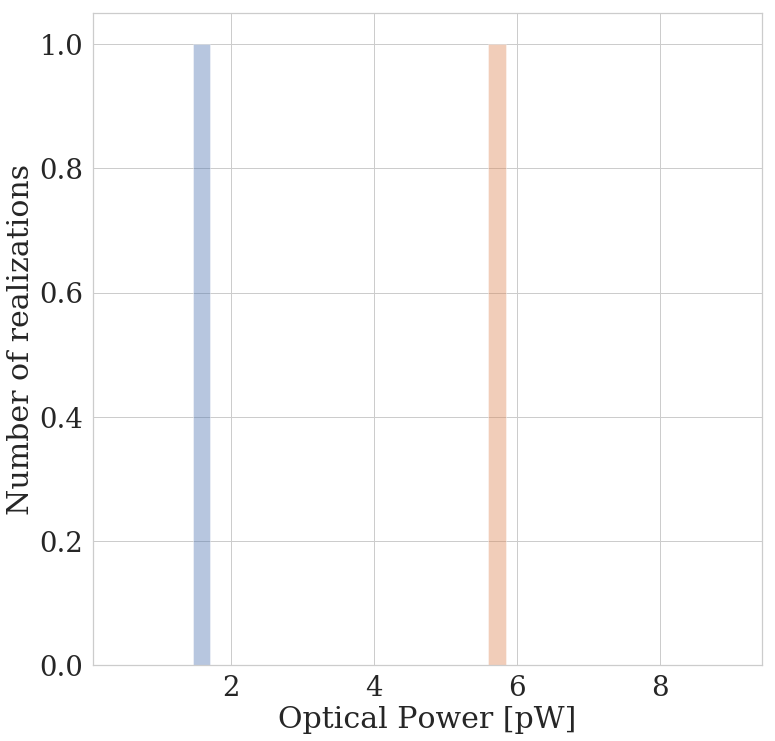

In [31]:
bins = np.linspace(0.5, 9, 36)
plt.figure(figsize=figsize)
sns.distplot(cam_1.astype(np.float), kde=False, bins=bins)
sns.distplot(cam_2.astype(np.float), kde=False, bins=bins)
plt.xlabel("Optical Power [pW]")
plt.ylabel("Number of realizations")
plt.show()

### NET histogram

In [32]:
# Load the NET output from the MC simulation
cam_1 = unpack.sens_outputs['V0']['Tel']['Cam']['All']['Cam_1']['Detector NET_CMB']
cam_2 = unpack.sens_outputs['V0']['Tel']['Cam']['All']['Cam_2']['Detector NET_CMB']

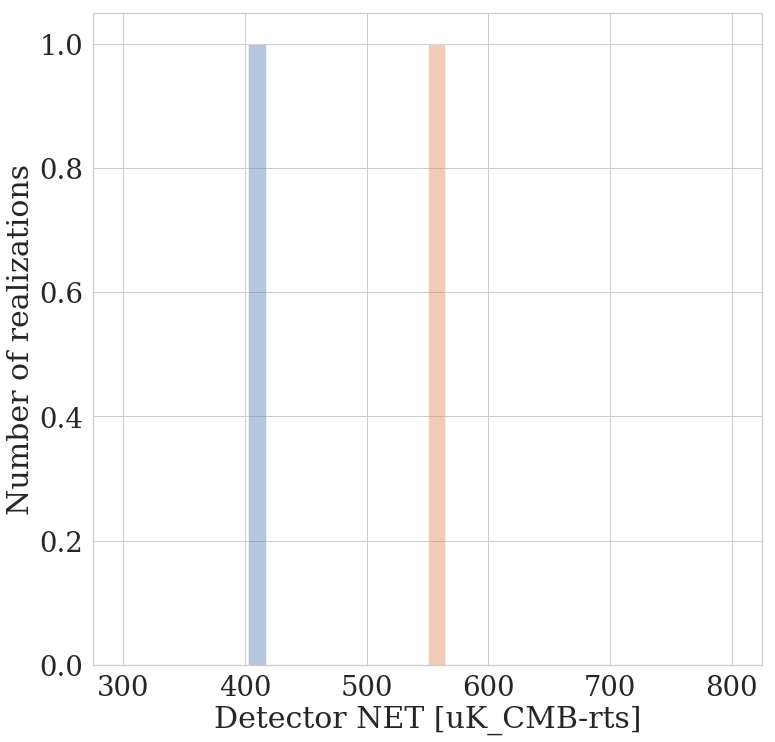

In [33]:
bins = np.linspace(300, 800, 35)
plt.figure(figsize=figsize)
sns.distplot(cam_1.astype(np.float), kde=False, bins=bins)
sns.distplot(cam_2.astype(np.float), kde=False, bins=bins)
plt.xlabel("Detector NET [uK_CMB-rts]")
plt.ylabel("Number of realizations")
plt.show()

# Analyzing parameter variation outputs

Analyzing the outputs of a parameter variation is similar to analyzing the sensitivity outputs, as discussed in the previous section, which we recommend you read before delving into this section.

## Unpacking outputs

After running your parameter variation simulation, you will unpack the parameter variation outputs using the method `unpack.unpack_parameter_vary(experiment_directory, parameter_variation_name)`, which creates a dictionary of input parameters `unpack.vary_inputs` and a dictionary of output parameters `unpack.vary_outputs`.

The `experiment_directory` argument needs to match the input experiment passed to `calcBolos.py`, and the `parameter_variation_name` either needs to match the passed `calcBolos.py` command-line argument `--vary_name`, or it must match whichever `Tel/Cam/paramVary/` directory name you want to analyze. If `--vary_name` is not specified, BoloCalc generates a file with the format `yyyymmdd_hh_mm_ss`, where `yyyymmdd` is the date, `hh` is the hour (0-23), `mm` is the minute, and `ss` is the second at which `calcBolos.py` was executed. 

The parameters to vary are defined in `BoloCalc/config/paramsToVary.txt`, and more information regarding this file can be found in the BoloCalc user manual. For the following examples, we use the default parameter variation for `ExampleExperiment/V0`, which is over `Psat` and `Det Eff` for frequency channel `Cam_2`. Also, as defined `BoloCalc/src/simInputs.txt`, we calculate, for each parameter set, we evaluate 10 experiment realizations, each with 10 detector realizations and 10 sky realizations for a total of 1,000 MC sims. To generate the output files, we run 

`BoloCalc $ python calcBolos.py Experiments/ExampleExperiment/V0 --vary --vary_name demo`

In [34]:
exp_dir = os.path.abspath(os.path.join(
    '..', 'Experiments', 'ExampleExperiment', 'V0'))
var_name = 'demo'
unpack.unpack_parameter_vary(exp_dir, var_name)

## Input dictionary structure

The input dictionary `unpack.vary_inputs` is, again, layered, and follows the telescope/camera/channel path of the varied parameter inputs. The lowest-level dictionary's keys are defined by an underscore-delimited string of the column entries (empty column entries are omitted from the string key) for each swept parameter in `BoloCalc/config/paramsToVary.txt`. Below a printout of the `unpack.vary_inputs` dictionary keys and values

In [35]:
for k in unpack.vary_inputs['V0']['Tel']['Cam'].keys():
    print("\n%s: " % (k), unpack.vary_inputs['V0']['Tel']['Cam'][k])


Cam_2_Psat:  [ 5.  5.  5.  5.  5.  5. 10. 10. 10. 10. 10. 10. 15. 15. 15. 15. 15. 15.
 20. 20. 20. 20. 20. 20. 25. 25. 25. 25. 25. 25. 30. 30. 30. 30. 30. 30.]

Cam_2_Det Eff:  [0.2 0.3 0.4 0.5 0.6 0.7 0.2 0.3 0.4 0.5 0.6 0.7 0.2 0.3 0.4 0.5 0.6 0.7
 0.2 0.3 0.4 0.5 0.6 0.7 0.2 0.3 0.4 0.5 0.6 0.7 0.2 0.3 0.4 0.5 0.6 0.7]


## Output dictionary structure

The output dictionary structure for parameter sweeps is similar to that of the sensitivity output dictionary structure, except that sensitivity outputs are not combined at the telescope and experiment levels: the sensitivity values are only available at the camera level. Therefore, the output dictionary is organized into the following format

**There are two types of vary outputs**:
1. `"Summary"`: Sensitivity summary data, which is a three-element array of `[median, high spread, low spread]`, where the percentiles defined in `BoloCalc/config/simulationInputs.txt` = `[low CL, high CL]` are defined by `[median - low spread, median + high spread]`
2. `"All"`: All MC data, which is an array of calculated outputs for every MC realization

**The sensitivity data is embedded in the layered dictionary** `unpack.sens_outputs`, which has four levels:

1. First-layer key = experiment (e.g. `"V0"`)
2. Second-layer keys = telescopes (e.g. `"Tel"`)
3. Third-layer keys = cameras (e.g. `"Cam"`)
4. Fourth-layer key = camera sensitivity summary `"Summary"` or all MC outputs `"All"`

The `"Summary"` data is stored as `[median, high spread, low spread]` arrays for every parameter set in each channel's dictionary, while the `"All"` data is stored as arrays of the ouput for every simulation for every parameter set in each channel's dictionary. 

Below is a printout of the dictionary and data structure for the parametre variation outputs. For this particular simulation, we ran 1,000 MC realizations for 36 parameter combinations.

In [36]:
print("Keys at each camera level")
print(list(unpack.vary_outputs['V0']['Tel']['Cam'].keys()))
print("\nChannel keys in both the 'Summary' "
      "and 'All' dictionaries")
print(list(unpack.vary_outputs['V0']['Tel'][
    'Cam']['All'].keys()))
print("\nData shape for both the 'Summary' and "
      "'All' sensitivity parameters")
print("Summary:", np.shape(unpack.vary_outputs['V0'][
    'Tel']['Cam']['Summary']['Cam_1']['Optical Power']))
print("All:", np.shape(unpack.vary_outputs['V0'][
    'Tel']['Cam']['All']['Cam_1']['Optical Power']))

Keys at each camera level
['Summary', 'All']

Channel keys in both the 'Summary' and 'All' dictionaries
['Cam_2']

Data shape for both the 'Summary' and 'All' sensitivity parameters


KeyError: 'Cam_1'

## Example parameter variation plots

Typically, users want to show how an output parameter depends on combinations of output parameters. Below, we show a few common plots that folks generate when sweeping over parameters in BoloCalc.

### Detector NET overplot

In [37]:
# Unpack the input parameters
cam_2_psat = unpack.vary_inputs['V0']['Tel'][
    'Cam']['Cam_2_Psat']
cam_2_detEff = unpack.vary_inputs['V0']['Tel'][
    'Cam']['Cam_2_Det Eff']

# Unpack the summary outputs
cam_2_net = unpack.vary_outputs['V0']['Tel']['Cam'][
    'Summary']['Cam_2']['Detector NET_CMB']

In [38]:
# Reshape the arrays
cam_2_psat_unique = np.unique(cam_2_psat)
cam_2_detEff_unique = np.unique(cam_2_detEff)
cam_2_net_shaped = np.reshape(
    cam_2_net, (len(cam_2_psat_unique),
                len(cam_2_detEff_unique), -1))

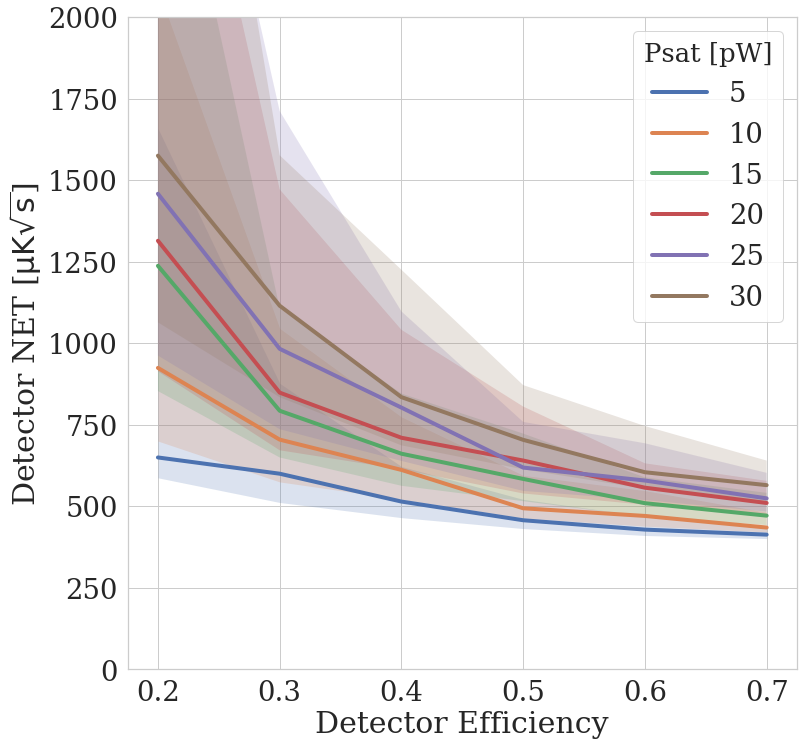

In [39]:
# Overplot the median and spreads as shaded regions
plt.figure(figsize=figsize)
for i, psat in enumerate(cam_2_psat_unique):
    xarr = cam_2_detEff_unique
    med, hi, lo = cam_2_net_shaped[i].T
    p1 = plt.plot(xarr, med, linewidth=4, linestyle='-',
                  label="%d" % (psat))
    plt.fill_between(xarr, med-lo, med+hi,
                     color=p1[0].get_color(), linewidth=0, alpha=0.2)
plt.xlabel("Detector Efficiency")
plt.ylabel("Detector NET [$\mathrm{\mu K \sqrt{s}}$]")
plt.ylim(top=2000, bottom=0)
leg = plt.legend(title="Psat [pW]")
plt.setp(leg.get_title(), fontsize=26)
plt.show()

### Detector NEP violin plot

In [40]:
# Unpack the all MC outputs
cam_2_nep = unpack.vary_outputs['V0']['Tel']['Cam'][
    'All']['Cam_2']['Detector NEP']

# Reshape output array
cam_2_nep_shaped = np.reshape(
    cam_2_nep, (len(cam_2_psat_unique),
                len(cam_2_detEff_unique), -1))

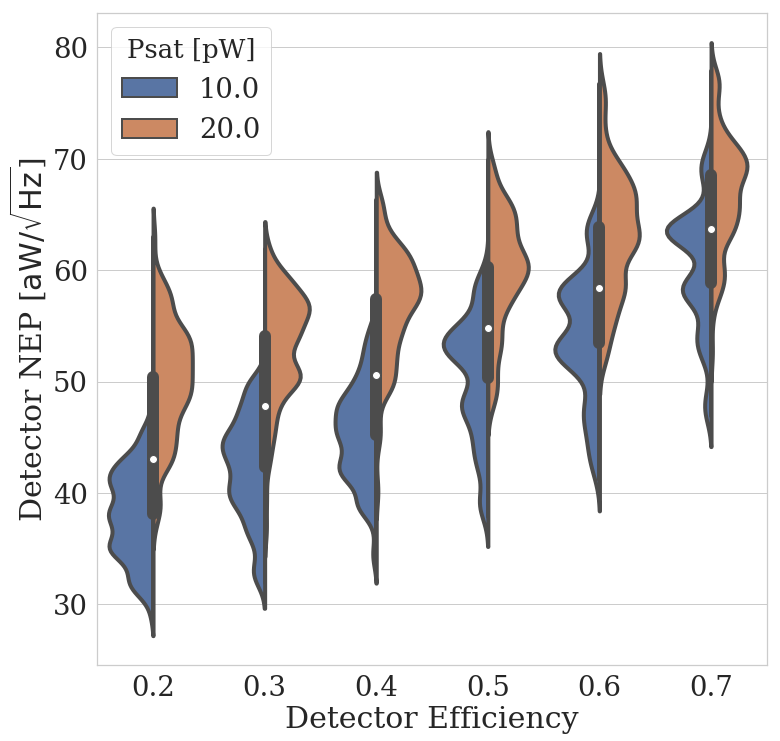

In [41]:
# Convert to long-form data
nsim = np.shape(cam_2_nep_shaped)[-1]
xarr = np.repeat(cam_2_detEff, nsim)
zarr = np.repeat(cam_2_psat, nsim)
yarr = cam_2_nep.flatten()
# Select a subset of Psat values
psat_vals = [10, 20]
args = np.array([np.argwhere(zarr == p)
                 for p in psat_vals]).flatten()
xarr = np.take(xarr, args)
yarr = np.take(yarr, args)
zarr = np.take(zarr, args)

plt.figure(figsize=figsize)
sns.violinplot(xarr, yarr, hue=zarr, linewidth=4,
               linestyle='-', label="%d" % (psat), split=True)
plt.xlabel("Detector Efficiency")
plt.ylabel("Detector NEP [$\mathrm{aW / \sqrt{Hz}}$]")
leg = plt.legend(title="Psat [pW]")
plt.setp(leg.get_title(),fontsize=26)
plt.show()

# Analyzing optical power

As part of its sensitivity calcultion, BoloCalc generates a file at the camera level called (in the Example Experiment) `ExampleExperiment/Tel/Cam/optical_power.txt` that shows how optical power propagates through the optical stack defined in `Cam/config/optics.txt`. To acces this data, use the unpack function `unpack.unpack_optical_powers(experiment_directory)`, where in a similar way to with sensitivity unpacking, `experiment_direcotory` is the directory passed to `calc_bolos.py`. Below is an example for unpacking the example experiment.

In [42]:
exp_dir = os.path.abspath(os.path.join(
    '..', 'Experiments', 'ExampleExperiment', 'V0'))
unpack.unpack_optical_powers(exp_dir)

## Example optical power tables

The most common use for the optical power outputs is to generate a table of a similar format to that viewed in `optical_power.txt`. The below example code shows how one might generate iPython-friendly optical power tables for the two channels in the Example Experiment.

In [130]:
# Load channel Cam_1
pwr_dict = unpack.pwr_outputs['V0']['Tel']['Cam']['Summary']['Cam_1']

# Build table
param_row = ['Element'] + list(list(pwr_dict.items())[0][1].keys())
unit_row = ['Units', '[pW]', '[NA]', '[NA]', '[NA]']
header_sep = ['---'] * len(param_row)
data_rows = []
for k, v in pwr_dict.items():
    vals = []
    for kk, vv in v.items():
        ss = spread(vv)
        vals.append(ss)
    data_rows.append([k] + vals)

# Generate table string
table_rows = [param_row, header_sep, unit_row]  + data_rows
table_str = ""
for row in table_rows:
    row_str = '|'.join(row)+'\n'
    table_str += row_str
print("Copy and paste the below into a separate markdown "
      "cell to render the table\n\n")
print(table_str)

Copy and paste the below into a separate markdown cell to render the table


Element|Power from Sky|Power to Detector|Efficiency|Cumulative Efficiency
---|---|---|---|---
Units|[pW]|[NA]|[NA]|[NA]
CMB|0|0.055|1|0.114
ATM|0.295|0.484|0.964|0.118
Primary|2.878|0.172|0.988|0.12
Mirror|3.705|0.029|0.998|0.12
Window|3.841|0.684|0.933|0.129
IRShader1|6.759|0.016|0.999|0.129
IRShader2|6.829|0.014|0.999|0.129
IRShader3|6.886|0.011|0.999|0.129
AbsFilter|6.932|0.046|0.97|0.133
LowPass1|6.931|0.024|0.941|0.141
Lens1|6.619|0.009|0.935|0.151
LowPass2|6.226|0.002|0.941|0.161
Lens2|5.862|0|0.99|0.162
Aperture|5.804|0.092|0.309|0.525
LowPass3|1.869|0.001|0.941|0.559
Lens3|1.76|0.001|0.99|0.564
LowPass4|1.743|0.001|0.941|0.6
Detector|1.64|0|0.6|1



Element|Power from Sky|Power to Detector|Efficiency|Cumulative Efficiency
---|---|---|---|---
Units|[pW]|[NA]|[NA]|[NA]
CMB|0|0.055|1|0.114
ATM|0.295|0.484|0.964|0.118
Primary|2.878|0.172|0.988|0.12
Mirror|3.705|0.029|0.998|0.12
Window|3.841|0.684|0.933|0.129
IRShader1|6.759|0.016|0.999|0.129
IRShader2|6.829|0.014|0.999|0.129
IRShader3|6.886|0.011|0.999|0.129
AbsFilter|6.932|0.046|0.97|0.133
LowPass1|6.931|0.024|0.941|0.141
Lens1|6.619|0.009|0.935|0.151
LowPass2|6.226|0.002|0.941|0.161
Lens2|5.862|0|0.99|0.162
Aperture|5.804|0.092|0.309|0.525
LowPass3|1.869|0.001|0.941|0.559
Lens3|1.76|0.001|0.99|0.564
LowPass4|1.743|0.001|0.941|0.6
Detector|1.64|0|0.6|1

In [131]:
# Load channel Cam_1
pwr_dict = unpack.pwr_outputs['V0']['Tel']['Cam']['Summary']['Cam_2']

# Build table
param_row = ['Element'] + list(list(pwr_dict.items())[0][1].keys())
unit_row = ['Units', '[pW]', '[NA]', '[NA]', '[NA]']
header_sep = ['---'] * len(param_row)
data_rows = []
for k, v in pwr_dict.items():
    vals = []
    for kk, vv in v.items():
        ss = spread(vv)
        vals.append(ss)
    data_rows.append([k] + vals)

# Generate table string
table_rows = [param_row, header_sep, unit_row]  + data_rows
table_str = ""
for row in table_rows:
    row_str = '|'.join(row)+'\n'
    table_str += row_str
print("Copy and paste the below into a separate markdown "
      "cell to render the table\n\n")
print(table_str)

Copy and paste the below into a separate markdown cell to render the table


Element|Power from Sky|Power to Detector|Efficiency|Cumulative Efficiency
---|---|---|---|---
Units|[pW]|[NA]|[NA]|[NA]
CMB|0|0.077|1|0.224
ATM|0.209|1.103|0.971|0.231
Primary|3.043|0.589|0.985|0.235
Mirror|4.504|0.197|0.995|0.236
Window|4.984|3.482|0.903|0.261
IRShader1|12.5|0.047|0.999|0.261
IRShader2|12.595|0.039|0.999|0.262
IRShader3|12.672|0.032|0.999|0.262
AbsFilter|12.733|0.128|0.97|0.27
LowPass1|12.639|0.065|0.941|0.287
Lens1|12.023|0.016|0.935|0.307
LowPass2|11.277|0.003|0.941|0.326
Lens2|10.611|0|0.985|0.331
Aperture|10.453|0.026|0.634|0.523
LowPass3|6.662|0.001|0.941|0.556
Lens3|6.267|0.001|0.985|0.564
LowPass4|6.174|0|0.941|0.6
Detector|5.807|0|0.6|1



Element|Power from Sky|Power to Detector|Efficiency|Cumulative Efficiency
---|---|---|---|---
Units|[pW]|[NA]|[NA]|[NA]
CMB|0|0.077|1|0.224
ATM|0.209|1.103|0.971|0.231
Primary|3.043|0.589|0.985|0.235
Mirror|4.504|0.197|0.995|0.236
Window|4.984|3.482|0.903|0.261
IRShader1|12.5|0.047|0.999|0.261
IRShader2|12.595|0.039|0.999|0.262
IRShader3|12.672|0.032|0.999|0.262
AbsFilter|12.733|0.128|0.97|0.27
LowPass1|12.639|0.065|0.941|0.287
Lens1|12.023|0.016|0.935|0.307
LowPass2|11.277|0.003|0.941|0.326
Lens2|10.611|0|0.985|0.331
Aperture|10.453|0.026|0.634|0.523
LowPass3|6.662|0.001|0.941|0.556
Lens3|6.267|0.001|0.985|0.564
LowPass4|6.174|0|0.941|0.6
Detector|5.807|0|0.6|1